In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.model_selection import train_test_split

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index


**Data preprocessing**

In [2]:
telco=pd.read_csv('E:\\Telco-Customer-Churn.csv')

In [3]:
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1758,5848-FHRFC,Female,0,No,No,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,1386.9,No
219,6496-JDSSB,Female,0,No,No,8,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),80.00,624.6,No
1612,3092-IGHWF,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,No,Electronic check,87.40,5918.8,Yes
2468,2636-OHFMN,Male,0,Yes,No,4,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.55,201,Yes
6487,5998-DZLYR,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),94.35,5703,No


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telco['Churn'] = labelencoder.fit_transform(telco['Churn'])
telco['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [6]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(telco, columns = categorical, drop_first= True)
survivaldata.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [7]:
survivaldata.drop(['customerID', 'tenure', 'Churn'], axis = 1, inplace= True)

In [8]:
event_var = telco['Churn']
time_var = telco['tenure']


Here Churn is event of interest that takes values 0 (not_churned),1(churned)
tenure is time to event(Survival time), this variable represents the time it takes for an event to occur

Text(0.5, 1.0, 'Kaplan-Meier Curve')

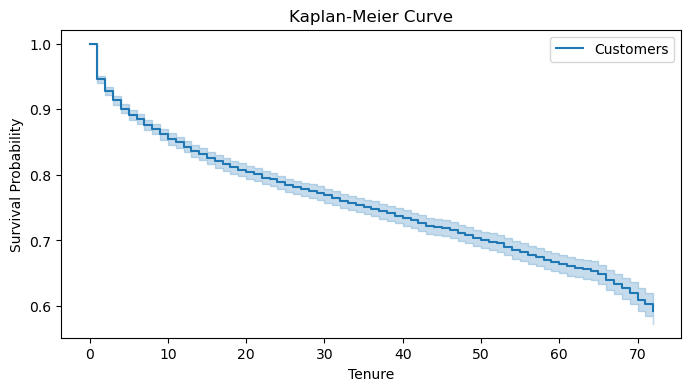

In [9]:
#Create a KaplanMeier object 
kmf = KaplanMeierFitter()
#Calculate the K-M curve for all groups
plt.figure(figsize=(8,4))
kmf.fit(time_var,event_observed = event_var,label = "Customers")
#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Survival Probability')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve')

We can see that there is a sudden drop in survival probability at the starting of the tenure.This maybe due to more churning of customers with Month to month subscription. the rate of change in survival probability decreases with tenure.Hence we can provide more offers,services on long term plans. 

**gender**

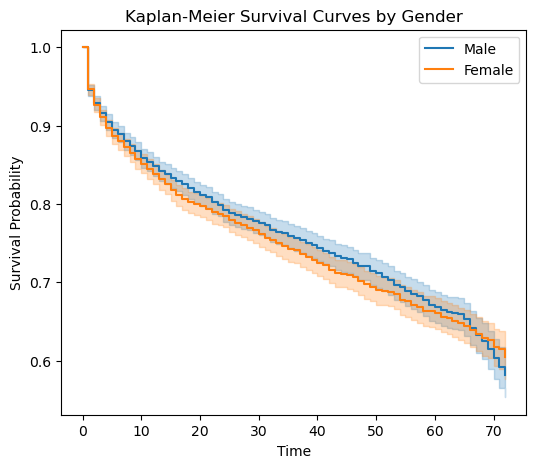

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

In [10]:
male = (survivaldata['gender_Male'] == 1)
female = (survivaldata['gender_Male'] == 0)
# Assuming you have defined kmf, time_var, and event_var before this code

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Fit and plot Kaplan-Meier for Male
kmf.fit(time_var[male], event_observed=event_var[male], label="Male")
kmf.plot(ax=ax)

# Fit and plot Kaplan-Meier for Female
kmf.fit(time_var[female], event_observed=event_var[female], label="Female")
kmf.plot(ax=ax)

# Set the x-axis and y-axis labels
plt.xlabel("Time")
plt.ylabel("Survival Probability")

# Set the title
plt.title("Kaplan-Meier Survival Curves by Gender")

# Show the plot
plt.show()

# Perform log-rank test
test_results = logrank_test(time_var[male], time_var[female],event_observed_A=event_var[male],event_observed_B=event_var[female])

# Print the summary
test_results.print_summary()


**SeniorCitizen**

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.49 <0.005     82.71

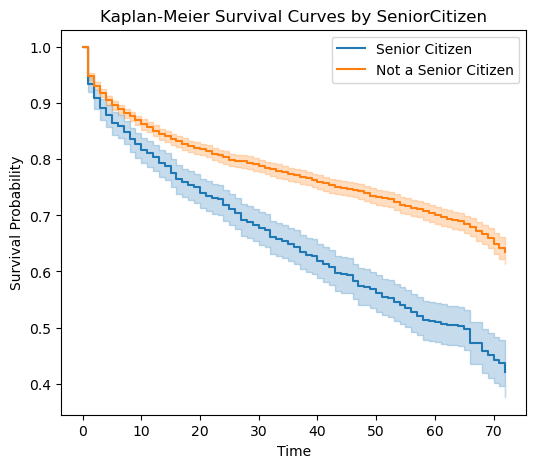

In [11]:
SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 1)
not_SeniorCitizen = (survivaldata['SeniorCitizen_1'] == 0)

fig, ax = plt.subplots(1,1,figsize=(6, 5))

kmf.fit(time_var[SeniorCitizen],event_observed = event_var[SeniorCitizen],label = "Senior Citizen")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[not_SeniorCitizen],event_observed = event_var[not_SeniorCitizen],label = "Not a Senior Citizen")
plot2 = kmf.plot(ax = ax)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by SeniorCitizen")
test_results = logrank_test(time_var[SeniorCitizen], time_var[not_SeniorCitizen], event_observed_A=event_var[SeniorCitizen], event_observed_B=event_var[not_SeniorCitizen])
test_results.print_summary()

**Partner**

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

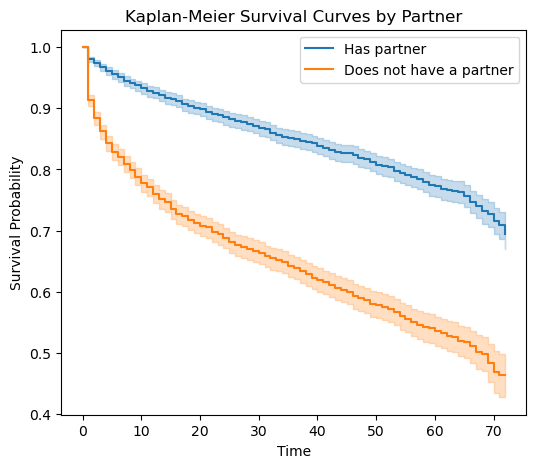

In [12]:
partner = (survivaldata['Partner_Yes'] == 1)
no_partner = (survivaldata['Partner_Yes'] == 0)

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[partner],event_observed = event_var[partner],label = "Has partner")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[no_partner],event_observed = event_var[no_partner],label = "Does not have a partner")
plot2 = kmf.plot(ax = ax)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by Partner")
test_results = logrank_test(time_var[partner], time_var[no_partner], event_observed_A=event_var[partner], event_observed_B=event_var[no_partner])
test_results.print_summary()

**Dependents**

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         232.70 <0.005    172.12

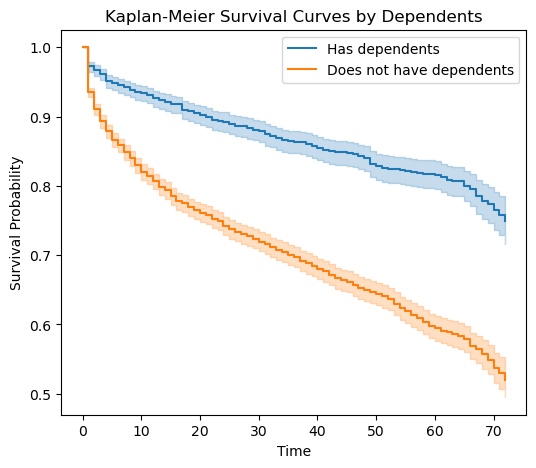

In [13]:
Dependents = (survivaldata['Dependents_Yes'] == 1)
no_Dependents = (survivaldata['Dependents_Yes'] == 0)

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[Dependents],event_observed = event_var[Dependents],label = "Has dependents")
plot1 = kmf.plot(ax = ax)
kmf.fit(time_var[no_Dependents],event_observed = event_var[no_Dependents],label = "Does not have dependents")
plot2 = kmf.plot(ax = ax)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by Dependents")
test_results = logrank_test(time_var[Dependents], time_var[no_Dependents], event_observed_A=event_var[Dependents], event_observed_B=event_var[no_Dependents])
test_results.print_summary()

**PhoneService**

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

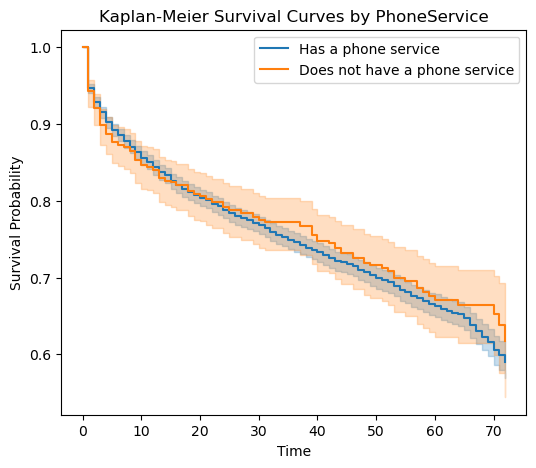

In [14]:
PhoneService = (survivaldata['PhoneService_Yes'] == 1)
no_PhoneService = (survivaldata['PhoneService_Yes'] == 0)

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[PhoneService],event_observed = event_var[PhoneService],label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[no_PhoneService],event_observed = event_var[no_PhoneService],label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by PhoneService")
test_results = logrank_test(time_var[PhoneService], time_var[no_PhoneService], event_observed_A=event_var[PhoneService], event_observed_B=event_var[no_PhoneService])
test_results.print_summary()

**MultipleLines**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          30.97 <0.005     22.34

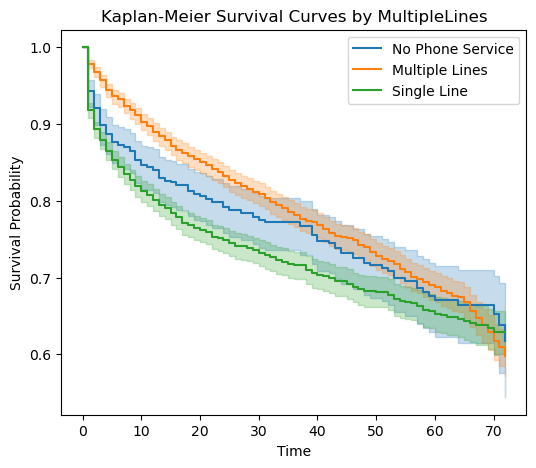

In [15]:
no_phone = (survivaldata['MultipleLines_No phone service'] == 1)
multiLines = (survivaldata['MultipleLines_Yes'] == 1)
no_multiLines = ((survivaldata['MultipleLines_Yes'] == 0) & (survivaldata['MultipleLines_No phone service'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_phone],event_observed = event_var[no_phone],label = "No Phone Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[multiLines],event_observed = event_var[multiLines],label = "Multiple Lines")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_multiLines],event_observed = event_var[no_multiLines],label = "Single Line")
plot3 = kmf.plot(ax = ax)
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by MultipleLines")
test_results = multivariate_logrank_test(telco['tenure'], telco['MultipleLines'], telco['Churn'])
test_results.print_summary()

**InternetService**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         520.12 <0.005    375.19

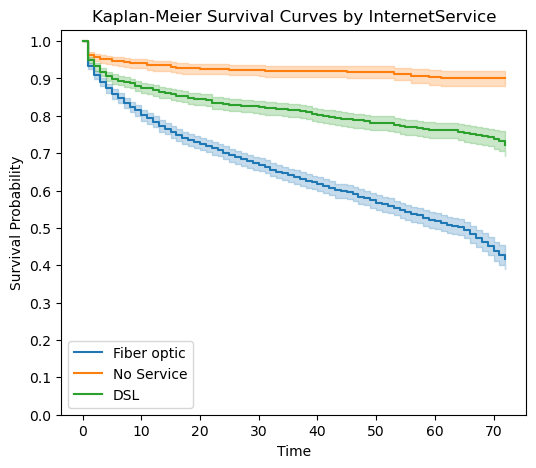

In [16]:
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[Fiber_optic],event_observed = event_var[Fiber_optic],label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[No_Service],event_observed = event_var[No_Service],label = "No Service")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[DSL],event_observed = event_var[DSL],label = "DSL")
plot3 = kmf.plot(ax = ax)

plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by InternetService")
plt.yticks(np.linspace(0,1,11))
test_results = multivariate_logrank_test(telco['tenure'], telco['InternetService'], telco['Churn'])
test_results.print_summary()

**OnlineSecurity**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1013.86 <0.005    731.35

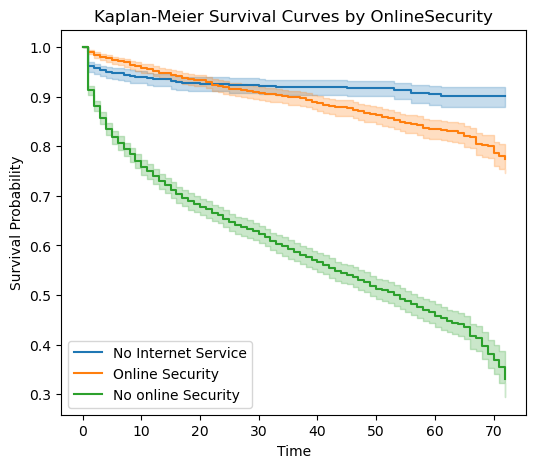

In [17]:
no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) & (survivaldata['OnlineSecurity_Yes'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_internetService],event_observed = event_var[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[onlineSecurity],event_observed = event_var[onlineSecurity],label = "Online Security")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_onlineSecurity],event_observed = event_var[no_onlineSecurity],label = "No online Security")
plot3 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by OnlineSecurity")
test_results = multivariate_logrank_test(telco['tenure'], telco['OnlineSecurity'], telco['Churn'])
test_results.print_summary()

**OnlineBackup**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         821.34 <0.005    592.47

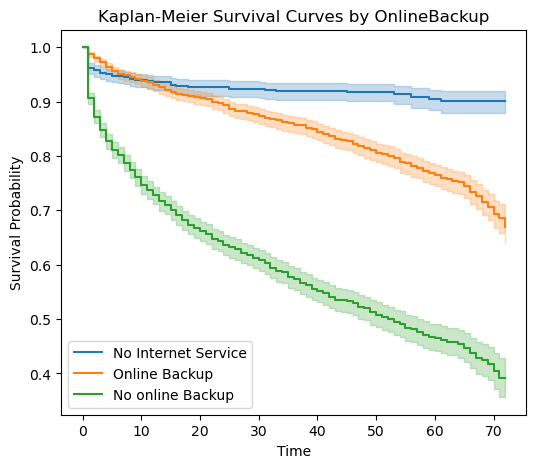

In [18]:
no_internetService = (survivaldata['OnlineBackup_No internet service'] == 1)
onlineBackup = (survivaldata['OnlineBackup_Yes'] == 1)
no_onlineBackup = ((survivaldata['OnlineBackup_No internet service'] == 0) & (survivaldata['OnlineBackup_Yes'] == 0))
fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_internetService],event_observed = event_var[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[onlineBackup],event_observed = event_var[onlineBackup],label = "Online Backup")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_onlineBackup],event_observed = event_var[no_onlineBackup],label = "No online Backup")
plot3 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by OnlineBackup")
test_results = multivariate_logrank_test(telco['tenure'], telco['OnlineBackup'], telco['Churn'])
test_results.print_summary()

**DeviceProtection**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         763.51 <0.005    550.75

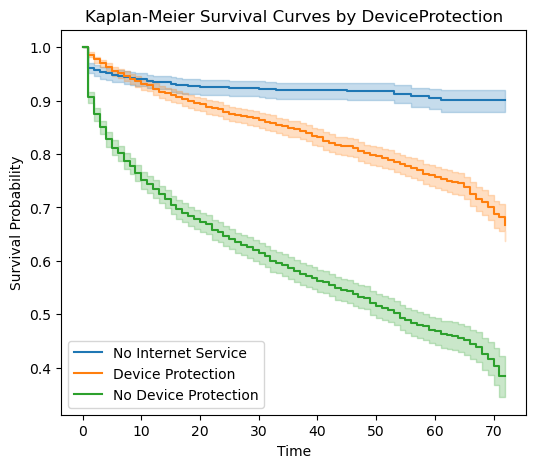

In [19]:
no_internetService = (survivaldata['DeviceProtection_No internet service'] == 1)
DeviceProtection = (survivaldata['DeviceProtection_Yes'] == 1)
no_DeviceProtection = ((survivaldata['DeviceProtection_No internet service'] == 0) & (survivaldata['DeviceProtection_Yes'] == 0))

fig ,ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_internetService],event_observed = event_var[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[DeviceProtection],event_observed = event_var[DeviceProtection],label = "Device Protection")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_DeviceProtection],event_observed = event_var[no_DeviceProtection],label = "No Device Protection")
plot3 = kmf.plot(ax = ax)

plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by DeviceProtection")
test_results = multivariate_logrank_test(telco['tenure'], telco['DeviceProtection'], telco['Churn'])
test_results.print_summary()

**TechSupport**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         989.56 <0.005    713.82

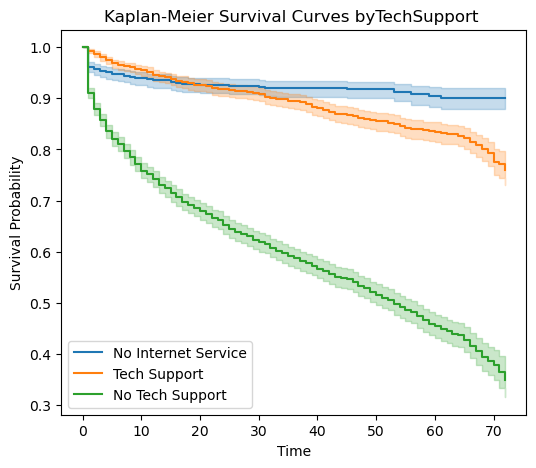

In [20]:
no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_Yes'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) & (survivaldata['TechSupport_Yes'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_internetService],event_observed = event_var[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[TechSupport],event_observed = event_var[TechSupport],label = "Tech Support")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_TechSupport],event_observed = event_var[no_TechSupport],label = "No Tech Support")
plot3 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves byTechSupport ")
test_results = multivariate_logrank_test(telco['tenure'], telco['TechSupport'], telco['Churn'], alpha = 0.95)
test_results.print_summary()

**StreamingTV**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         368.31 <0.005    265.68

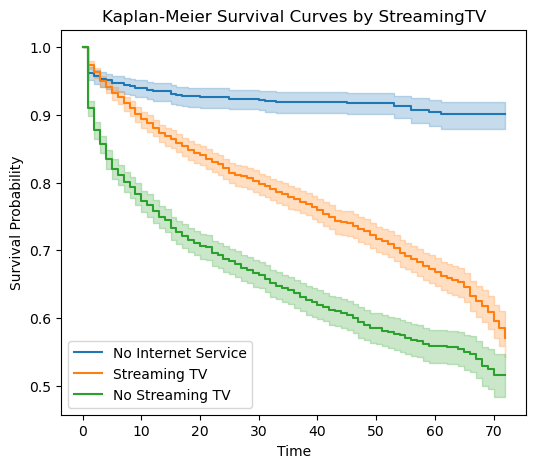

In [21]:
no_internetService = (survivaldata['StreamingTV_No internet service'] == 1)
StreamingTV = (survivaldata['StreamingTV_Yes'] == 1)
no_StreamingTV = ((survivaldata['StreamingTV_No internet service'] == 0) & (survivaldata['StreamingTV_Yes'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_internetService],event_observed = event_var[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[StreamingTV],event_observed = event_var[StreamingTV],label = "Streaming TV")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_StreamingTV],event_observed = event_var[no_StreamingTV],label = "No Streaming TV")
plot3 = kmf.plot(ax = ax)
            
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by StreamingTV")
test_results = multivariate_logrank_test(telco['tenure'],telco['StreamingTV'], telco['Churn'], alpha = 0.95)
test_results.print_summary()

**StreamingMovies**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         378.43 <0.005    272.98

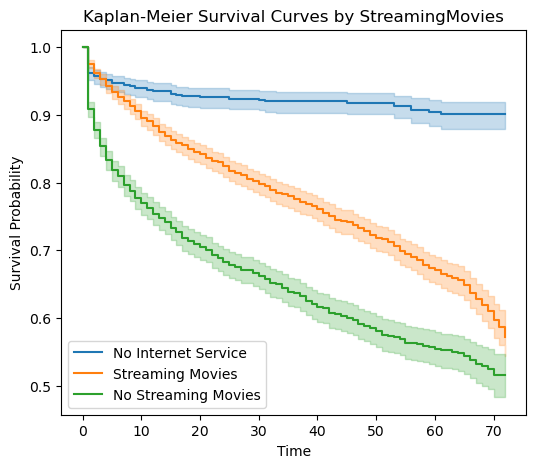

In [22]:
no_internetService = (survivaldata['StreamingMovies_No internet service'] == 1)
StreamingMovies = (survivaldata['StreamingMovies_Yes'] == 1)
no_StreamingMovies = ((survivaldata['StreamingMovies_No internet service'] == 0) & (survivaldata['StreamingMovies_Yes'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[no_internetService],event_observed = event_var[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[StreamingMovies],event_observed = event_var[StreamingMovies],label = "Streaming Movies")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[no_StreamingMovies],event_observed = event_var[no_StreamingMovies],label = "No Streaming Movies")
plot3 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by StreamingMovies")
test_results = multivariate_logrank_test(telco['tenure'], telco['StreamingMovies'], telco['Churn'], alpha = 0.95)
test_results.print_summary()

**Contract**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        2352.87 <0.005       inf

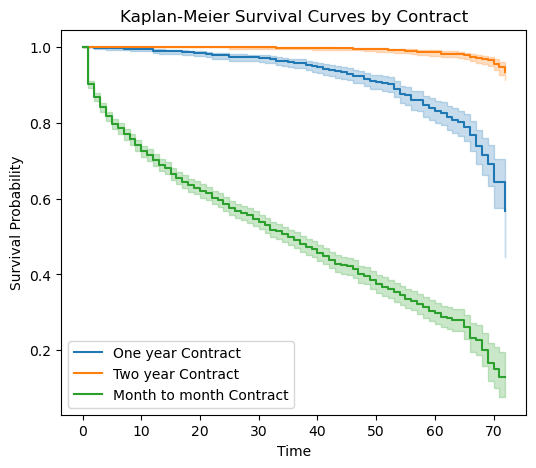

In [23]:
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[Contract_One_year],event_observed = event_var[Contract_One_year],label = "One year Contract")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[Contract_Two_year],event_observed = event_var[Contract_Two_year],label = "Two year Contract")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[Contract_month_to_month],event_observed = event_var[Contract_month_to_month],label = "Month to month Contract")
plot3 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by Contract")
test_results = multivariate_logrank_test(telco['tenure'], telco['Contract'], telco['Churn'])
test_results.print_summary()

**PaperlessBilling**

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.51 <0.005    140.82

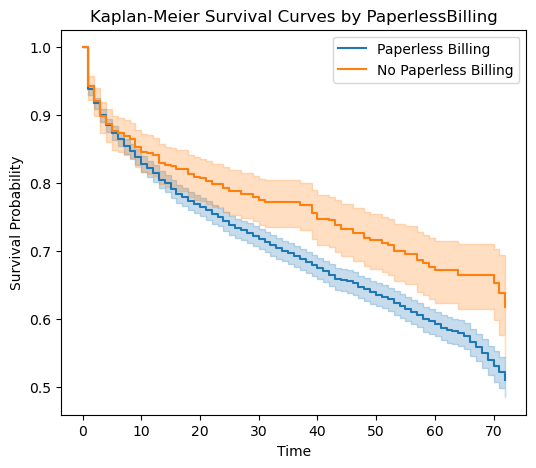

In [24]:
PaperlessBilling = survivaldata['PaperlessBilling_Yes'] == 1
no_PaperlessBilling = survivaldata['PaperlessBilling_Yes'] == 0
fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[PaperlessBilling],event_observed = event_var[PaperlessBilling],label = "Paperless Billing")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[no_PhoneService],event_observed = event_var[no_PhoneService],label = "No Paperless Billing")
plot2 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by PaperlessBilling")

test_results = logrank_test(time_var[PaperlessBilling], time_var[no_PaperlessBilling], event_observed_A=event_var[PaperlessBilling], event_observed_B=event_var[no_PaperlessBilling])
test_results.print_summary()

**PaymentMethod**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         865.24 <0.005    619.58

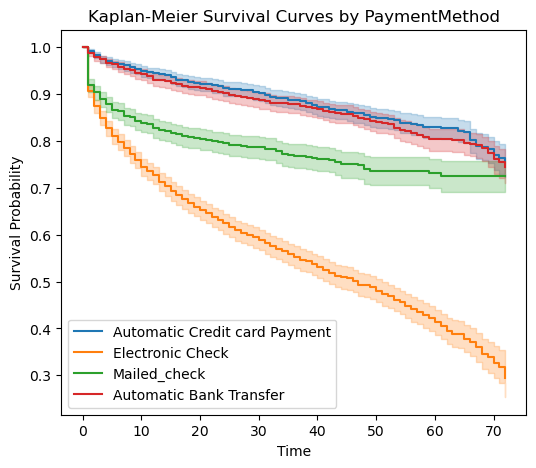

In [25]:
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

fig, ax = plt.subplots(1,1,figsize=(6,5))

kmf.fit(time_var[automatic_Credit_Card],event_observed = event_var[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)

kmf.fit(time_var[electronic_check],event_observed = event_var[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = ax)

kmf.fit(time_var[mailed_check],event_observed = event_var[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = ax)

kmf.fit(time_var[automatic_Bank_Transfer],event_observed = event_var[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = ax)
                 
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.title("Kaplan-Meier Survival Curves by PaymentMethod")
test_results = multivariate_logrank_test(telco['tenure'], telco['PaymentMethod'], telco['Churn'])
test_results.print_summary()

# Survival Regression

In [26]:
def data_pre_processing(filepath):
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace=True, axis=1)

    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce').fillna(0)

    binary_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    df[binary_cols] = df[binary_cols].replace({'No': 0, 'Yes': 1})

    df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
    

    binary_mapping = {'No phone service': 0,'No internet service': 0 ,'No': 0, 'Yes': 1}
    df['MultipleLines'] = df['MultipleLines'].replace(binary_mapping)

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

    for col in cols2:
        df[col] = df[col].replace(binary_mapping)
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    return df


In [27]:
regression_data=data_pre_processing('E:\\Telco-Customer-Churn.csv')

**Cox Proportional-Hazards Survival Regression Model**

In [28]:
# Fit the model
train_df, test_df = train_test_split(regression_data, test_size=0.2, random_state=10)
cph = CoxPHFitter()
cph.fit(train_df, duration_col='tenure', event_col='Churn')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4108 right-censored observations>

In [29]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4108 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1526
   partial log-likelihood = -9935.35
         time fit was run = 2023-12-01 11:06:38 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.02       1.02       0.05            -0.08             0.12                 0.92                 1.13
SeniorCitizen                          -0.02       0.98       0.06            -0.14             0.11                 0.87                 1.11
Partner                                -0.22       0.80       0.06            -0.34            -0.10                 0.71                 0.91
Dependents                             -0.04       0.96       0.08            -0.19             0.11                 0.83                 1.12
PhoneService                            0.95       2.58       0.52            -0.08             1.98                 0.92                 7.22
MultipleLines                           0.06       1.06       0.14            -0.21             0.33                 0.81                 1.40
OnlineSecurity                         -0.22       0.80       0.15            -0.51             0.07                 0.60                 1.07
OnlineBackup                           -0.05       0.95       0.14            -0.33             0.23                 0.72                 1.25
DeviceProtection                        0.07       1.08       0.14            -0.20             0.35                 0.82                 1.41
TechSupport                            -0.06       0.94       0.15            -0.35             0.22                 0.70                 1.25
StreamingTV                             0.22       1.25       0.26            -0.29             0.73                 0.75                 2.08
StreamingMovies                         0.32       1.37       0.26            -0.19             0.83                 0.82                 2.28
PaperlessBilling                        0.16       1.17       0.06             0.03             0.28                 1.03                 1.32
MonthlyCharges                          0.01       1.01       0.03            -0.04             0.06                 0.96                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.05       2.87       0.64            -0.19             2.30                 0.82                 9.98
InternetService_No                     -2.69       0.07       0.66            -3.98            -1.40                 0.02                 0.25
Contract_One year                      -1.27       0.28       0.11            -1.49            -1.05                 0.22                 0.35
Contract_Two year                      -3.65       0.03       0.23            -4.10            -3.21                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.00       1.00       0.10            -0.20             0.19                 0.82                 1.21
PaymentMethod_Electronic check          0.44       1.55       0.08             0.28             0.60                 1.32                 1.82
PaymentMethod_Mailed check              0.48       1.61       0.10             0.29             0.67                 1.33                 1.95

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00   0.35   0.7

# Interpreting the results of a Cox proportional hazards model
1. Coefficients:
Positive Coefficients: Variables with positive coefficients are associated with an increased hazard (risk) of the event occurring as they increase.
Negative Coefficients: Variables with negative coefficients are associated with a decreased hazard (lower risk) of the event occurring as they increase.
2. Hazard Ratios (HR):
HR represents the change in hazard for a one-unit change in the predictor variable.
HR greater than 1 implies an increased hazard (risk).
HR less than 1 implies a decreased hazard (protective effect).
3. Significance (p-values):
Low p-values (typically < 0.05) indicate that the variable is statistically significant.
If p-values are significant, it suggests that the associated variable is likely to have a significant impact on the hazard of the event.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

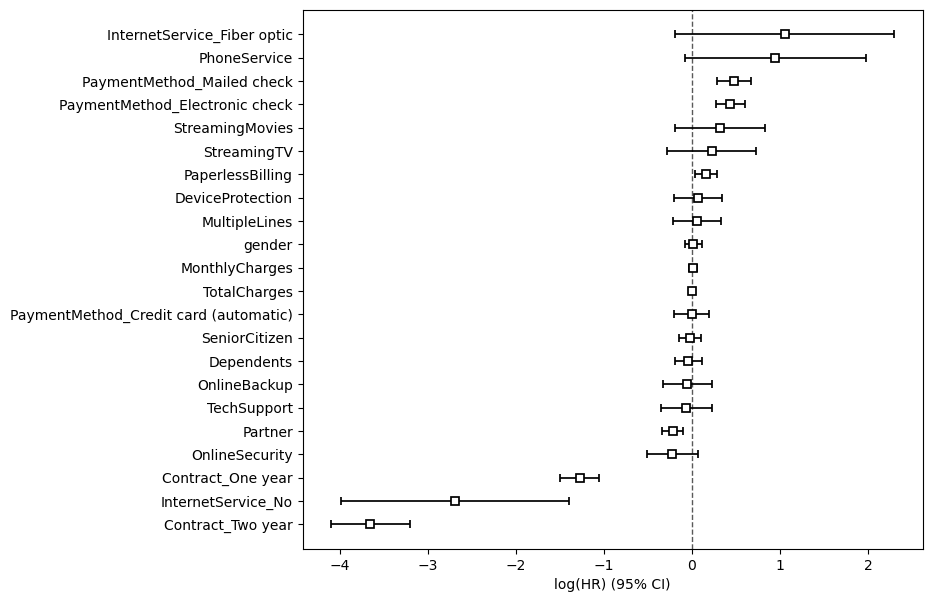

In [30]:
fig, ax = plt.subplots(figsize = (8,7))
cph.plot(ax = ax)

## To evaluate model performance

In [31]:
predicted_hazards = cph.predict_partial_hazard(test_df)

In [32]:
# Calculate the concordance index (C-index)
c_index = concordance_index(test_df['tenure'], -predicted_hazards, test_df['Churn'])
print(f"Concordance Index (C-index): {c_index}")


Concordance Index (C-index): 0.9165558371225055


<AxesSubplot:>

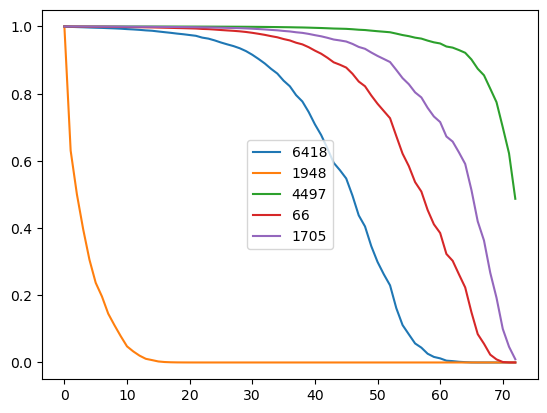

In [33]:
cph.predict_survival_function(test_df.iloc[:5]).plot()

In [34]:
import pickle

# Save the model to a file using pickle
with open('cph.pkl', 'wb') as file:
    pickle.dump(cph, file)
